# MC886 Assigment 1

## Objective:
Use linear regression model to predict the prices of diamonds given their atributes. The data set might be found on:
https://www.kaggle.com/shivam2503/diamonds.


## Activities
1.  Perform Linear Regression.  You should implement your solution and compare it with sklearn.linear model.SGDRegressor(“linear  model  fitted  by  minimizing  a  regularized  empirical  loss  with  SGD”).What are the conclusions?  
2.  Use the specified training/test data for providing your results and avoid overfitting.Keep in mind that friends don’t let friends use testing data for training.  
3.  Plot  the  cost  function  vs.  number  of  iterations  in  the  training  set  and  analyze  the  model  complexity. What are the conclusions?  What are the actions after such analyses?
4.  Use different Gradient Descent (GD) learning rates when optimizing.  Compare the GD-based solutionswith Normal Equation.  You should implement your solutions.  What are the conclusions?  
5.  Prepare  a  4-page  (max.)  report  with  all  your  findings.  It  is  UP  TO  YOU  to  convince  the  reader  that you are proficient on linear regression and the choices it entails.


In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle
from utils import *

In [2]:
data_dir = '../data/diamonds-train.csv'

In [3]:
with open(data_dir, 'rb') as csvfile:
    dataset = pd.read_csv(data_dir)
print(dataset.shape)

(45849, 10)


In [4]:
#        carat        cut color clarity     x     y     z  depth  table  price
print(dataset)

       carat        cut color clarity     x     y     z  depth  table  price
0       1.62      Ideal     I     VS2  7.53  7.58  4.69   62.1   55.0  10501
1       0.30    Premium     G     SI1  4.39  4.35  2.57   58.8   60.0    574
2       1.37      Ideal     F     VS1  7.28  7.22  4.32   59.6   57.0  11649
3       0.33       Fair     H    VVS2  4.40  4.32  2.84   65.1   59.0    922
4       0.32  Very Good     F     VS2  4.43  4.48  2.62   58.8   62.0    602
5       0.51    Premium     E     SI2  5.15  5.12  3.22   62.7   52.0   1205
6       1.50       Good     H     VS2  7.22  7.27  4.61   63.6   58.0  10291
7       0.85      Ideal     G     VS1  6.09  6.11  3.77   61.8   55.0   4373
8       0.33      Ideal     F     VS1  4.46  4.49  2.74   61.2   56.0    723
9       1.10      Ideal     G     VS1  6.69  6.65  4.09   61.3   54.0   6535
10      0.51  Very Good     E    VVS2  5.20  5.23  3.13   60.0   58.0   2365
11      0.54      Ideal     E     VS2  5.24  5.27  3.24   61.7   55.0   1754

## Preprocessing the data

### 1. Split data in training, validation and test
A wise person said: "friends don’t let friends use testing data for training". t.

**Note:**
* **sklearn.model_selection.train_test_split(*arrays, **options)**  
    Split arrays or matrices into random train and test subsets.  
    See documentation:http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

### 2. Put the dataset into Numpy volume
Categorical atributes are changed to integers.  
The cell bellow runs a code to shuffle and split the dataset into 3 sets, training, validation and test.

### 3. Transform categorical data into numbers
Used fit_transform function.
http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html  
http://pbpython.com/categorical-encoding.html

In [5]:
#RUN THIS ONLY ONCE!
#this code saves the numpy vectors to files, if the files already exists, don't run
# split_data(dataset)

In [6]:
#load the numpy files (training set, validation set, test set)
x_train, y_train, x_validation, y_validation = load_vectors()
y_train = y_train.reshape((1,y_train.shape[0]))
y_validation = y_validation.reshape((1,y_validation.shape[0]))
# y_test = y_test.reshape((1,y_test.shape[0]))

print("x_train.shape = ", x_train.shape)
print("y_train.shape = ", y_train.shape)
print("x_validation.shape = ", x_validation.shape)
print("y_validation.shape = ", y_validation.shape)
# print("x_test.shape = ", x_test.shape)
# print("y_test.shape = ", y_test.shape)
print("prices = ", y_train)
print("an input example = ", x_train[:, 0])

x_train.shape =  (9, 36679)
y_train.shape =  (1, 36679)
x_validation.shape =  (9, 9170)
y_validation.shape =  (1, 9170)
prices =  [[2409.  876. 2564. ... 1046. 2052. 7074.]]
an input example =  [ 0.7   2.    2.    2.    5.68  5.72  3.54 62.1  55.  ]


In [7]:
def init_parameters(X):
    """
    Receives: the input vector shape (nx, m), where nx is the number of features and
    m the number of examples.
    Returns:
    W: the weight array shape ( 1, nx)
    dW: the derivative array shape ( 1, nx)
    b: a vector shape (nx,1)
    db: the derivative of the bias.
    """
    nx = X.shape[0]
    W = np.random.randn(nx,1)*0.01
    dw = np.random.randn(nx,1)*0.01
    b = 0.
    db = 0.
    return W,b, dw, db

In [8]:
def l2_cost(X, Y, Y_hat, m):
    """
    Cost function defined by a variation of the l2 norm function.
    The '2' in the denominator makes its deriative easier
    """
    cost = (1.0/(2*m))*np.sum((Y-Y_hat)**2)
    return cost

In [9]:
#FORWARD PROPAGATION (WELL THIS IS NOT A NN, BUT ...)
def forward_prop(X, w, b):
    """
    X is the input vector with m training examples, shape (1,m)
    w: is the angular coefficient shape (9,1)
    b: is the linear coefficient  shape (9,1)
    Y_hat: a real number, the prediction 
    """
    Y_hat = np.sum(np.dot(w.T, X) + b)
    return Y_hat

In [10]:
def backward_propagation(X,Y, Y_hat, m):
    """
    Calculates the derivatives of the parameters
    returns:
    dw
    db
    """
    nx = X.shape[0]
    ny = Y.shape[0]
    dw = (-1./m)*np.dot(X,(Y -Y_hat).T)
    db = (-1./m)*np.sum((Y -Y_hat))
#     assert(dw.shape == (nx, ny))
    return dw, db

## Batch Gradient Descent Model
Given the cost function $J(w,b)$, where w is a vector of weights that multiply each of the input features and b is a real constant number we want to minimize it.
$$ J(w,b) = \frac{1}{2m}\sum_{i}^{m}(y^{(i)} - ŷ^{(i)})^{2} $$
$$ ŷ = wx + b$$
To use this algorithm we need to compute the derivatives of the cost (backward propagation) in order to update the parameters w and b.
$$\frac{\partial J(w,b)}{\partial w} = -\frac{1}{m}\sum_{i = i}^{m} (y - ŷ)x$$
$$\frac{\partial J(w,b)}{\partial w} = -\frac{1}{m}\sum_{i = i}^{m} (y - ŷ)$$

In [11]:
def GD_model(X,Y, lambd, num_iterations = 1000, learning_rate = 0.000000001):
    """
    Arguments:
    X: input array shape (nx, m), nx is the number of input features and m the number of
    training examples.
    Y: label array shape (ny, m) where ny is the number of the output feature.
    Given X and Y estimates the best linear function to fit the data
    """
    m = X.shape[1]
    print('number of iterations: ', num_iterations)
    print('m = ', m) 
    start_time = time.time()
    w,b,dw,db = init_parameters(x_train)
    for iteration in range(num_iterations):
        
        #forward propagation (we can think the activation function as linear)
        Y_hat = forward_prop(X,w,b)
        #plot the cost function
        cost = l2_cost(X,Y, Y_hat,m)
        plt.plot(iteration,cost,'ro')
    
        #Backward propagation calculate the derivatives 
        dw, db = backward_propagation(X,Y,Y_hat, m)
        reg_term = (float(lambd)/m)*w
        
        #Update parameters simultaneusly
        temp_w = w - learning_rate*dw
        
        #TO USE THE REGULARIZATION UNCOMMENT THE NEXT LINE
        #temp_w = w - (learning_rate*dw + reg_term)
        temp_b = b - learning_rate*db                    #AND COMMENT THIS
        w = temp_w
        b = temp_b
    print('training time: %.2fs'  %(time.time() - start_time))
    plt.xlabel('numero de iteracoes')
    plt.ylabel('erro quadratico medio')
    plt.show()
    return w, b, cost

number of iterations:  1000
m =  36679
training time: 2.13s


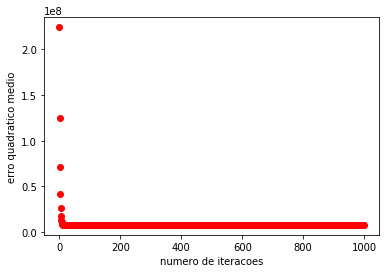

cost in the training set:  7956094.667704209
(9, 1)
weights:  [[ 0.01243014]
 [-0.00062822]
 [ 0.00668966]
 [-0.01309201]
 [ 0.01259344]
 [ 0.00196234]
 [ 0.00279136]
 [ 0.00182628]
 [-0.00127994]]


In [12]:
# TRIANIG THE GD
num_iterations = 1000
lambd = 0.001
w_gd, b_gd, cost_gd= GD_model(x_train,y_train,lambd, num_iterations=num_iterations)
print("cost in the training set: ", cost_gd)
print(w_gd.shape)
print("weights: ", w_gd)
# print("bias: ", b_gd)

## Stochastic Gradient Descent Model

In [13]:
def SGD_model(X,Y, num_iterations = 1, learning_rate = 0.000000001, shuffle_model=True):
    """
    X: an input array shape (nx, m), nx is the input feature size and m is the number of training examples
    Given X and Y estimates the best linear function to fit the data
    """
   
    m = X.shape[1]    # number of training examples
    nx = X.shape[0]   # number of features in the input
    ny = Y.shape[0]   # number of features in the label
    
    # initialize parameters
    w = np.random.randn(nx,1)*0.001
    dw = np.random.randn(nx,1)*0.001
    b = np.random.randn(1)*0.001
    db = np.random.randn(1)*0.001
    
    # for each epoch
    start_time = time.time()
    for iteration in range(num_iterations):
        if shuffle_model == True:
            tmp1, tmp2 = shuffle(X.T, Y.T)
            X, Y = tmp1.T, tmp2.T
        print("\riteração: ", iteration +1, end = "")
       
        Y_hat = np.empty((ny, m))
        for i in range(1000):
            #extract a columns of the input, remember the ith column has the ith example
            x_i = X[:, i].reshape(nx,1) #reshape to avoid rank 1 array
            y_i = Y[:, i].reshape(ny,1)

            #calulate the prediction y_hat
            y_hat_i = np.dot(w.T,x_i) + b
            Y_hat[:,i] = y_hat_i
            
            #calculate the derivatives
            dw, db = backward_propagation(x_i,y_i,y_hat_i, 1)
            reg_term = (float(lambd)/m)*w
            
            #TO USE REGULARIZATION UNCOMMENT THE NEXT LINE
            #temp_w = w - (learning_rate*dw + reg_term)
            temp_w = w - learning_rate*dw                  #AND COMMENT THIS ONE
            temp_b = b - learning_rate*db
            w = temp_w
            b = temp_b
            cost = l2_cost(X,Y, Y_hat,m)
            plt.plot(i,cost,'ro')
           
        #calculate and plot the cost
#         cost = l2_cost(X,Y, Y_hat,m)
#         plt.ylabel('Custo')
#         plt.xlabel('Iteracoes')
#         plt.plot(iteration,cost,'ro')
    print('\ntraining time: %.2fs'  %(time.time() - start_time))
    plt.show()
    return w, b, cost

iteração:  1
training time: 1.46s


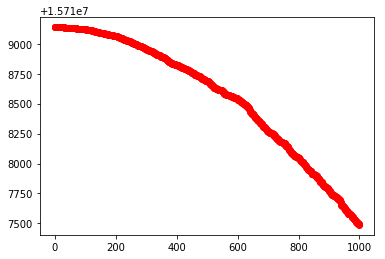

cost in the training set:  15717487.473729102


In [14]:
# TRAINING THE SDG MODEL
# dividindo pelo máximo
shuffle_model = True
num_iterations = 1

w_sgd, b_sgd, cost_sgd = SGD_model(x_train, y_train, num_iterations=num_iterations, shuffle_model=shuffle_model)
print("cost in the training set: ", cost_sgd)
# print("weights: ", w_sgd)
# print("bias: ", b_sgd)

## Scikit Learn SGD Regressor

In [15]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

train_size = x_train.shape[1]

clf = linear_model.SGDRegressor(loss='squared_loss', penalty='l2', learning_rate = 'constant', eta0 = 0.00000001)
start_time = time.time()
clf.fit(x_train.T, np.ravel(y_train.T))
print('training time: %.2fs'  %(time.time() - start_time))

# Make predictions using the testing set
y_hat = clf.predict(x_train.T)

# The coefficients
print('Coefficients: \n', clf.coef_)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_train.T, y_hat.T))

print("Error: %.2f"
      % l2_cost(x_train, y_train, y_hat, train_size))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_train.T, y_hat.T))

# cost [element] = l2_cost(x_train, y_train, y_)
# plt.show()
# print(cost)

training time: 0.02s
Coefficients: 
 [ 3.58381695  1.62900968  3.45383283  1.14369467 10.18368633 10.14648273
  6.2475779  31.9303619  31.75190052]
Mean squared error: 15640700.27
Error: 7820350.13
Variance score: 0.02


/home/pcmasterrace/miniconda2/envs/gpu/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


## Normal equation

In [16]:
x0_norm = np.ones((train_size, 1))
X_norm = np.concatenate((x0_norm, x_train.T), axis=1)
# # compute Normal Eq.
start_time = time.time()
XTX_inv = np.linalg.inv(np.matmul(X_norm.T, X_norm))
theta_norm = np.matmul(np.matmul(XTX_inv, X_norm.T), y_train.T)
print('training time: %.2fs'  %(time.time() - start_time))
print('Normal equation compute successfully =D')

training time: 0.00s
Normal equation compute successfully =D


In [17]:
# Test
X_validation_norm = np.concatenate((np.ones((x_validation.shape[1], 1)), x_validation.T), axis=1)
y_validation_norm = y_validation

for i in range(X_validation_norm.shape[0]):
    estimate = np.matmul(theta_norm.T, np.reshape(X_validation_norm[i], (X_norm.shape[1], 1)))
    print('i: %d; estimado: %.3lf; real: %.3lf; diferenca: %.3lf' 
          %(i, estimate, y_validation_norm[:,i], estimate-y_validation_norm[:,i]))

i: 0; estimado: 5838.827; real: 5694.000; diferenca: 144.827
i: 1; estimado: 1070.455; real: 620.000; diferenca: 450.455
i: 2; estimado: 4571.266; real: 3101.000; diferenca: 1470.266
i: 3; estimado: 12509.033; real: 5045.000; diferenca: 7464.033
i: 4; estimado: 7609.938; real: 6085.000; diferenca: 1524.938
i: 5; estimado: 2398.254; real: 1778.000; diferenca: 620.254
i: 6; estimado: 1316.075; real: 939.000; diferenca: 377.075
i: 7; estimado: 9468.048; real: 8324.000; diferenca: 1144.048
i: 8; estimado: 4142.952; real: 3967.000; diferenca: 175.952
i: 9; estimado: 2997.340; real: 2721.000; diferenca: 276.340
i: 10; estimado: 6511.032; real: 6627.000; diferenca: -115.968
i: 11; estimado: 4561.559; real: 3659.000; diferenca: 902.559
i: 12; estimado: -379.848; real: 478.000; diferenca: -857.848
i: 13; estimado: 3333.533; real: 3048.000; diferenca: 285.533
i: 14; estimado: 10241.130; real: 9576.000; diferenca: 665.130
i: 15; estimado: 699.860; real: 605.000; diferenca: 94.860
i: 16; estimado:

i: 901; estimado: 6811.988; real: 5278.000; diferenca: 1533.988
i: 902; estimado: 2557.607; real: 2268.000; diferenca: 289.607
i: 903; estimado: 6933.900; real: 6532.000; diferenca: 401.900
i: 904; estimado: 2918.172; real: 2768.000; diferenca: 150.172
i: 905; estimado: 2552.198; real: 2196.000; diferenca: 356.198
i: 906; estimado: 1056.890; real: 722.000; diferenca: 334.890
i: 907; estimado: 4027.113; real: 3497.000; diferenca: 530.113
i: 908; estimado: 226.641; real: 723.000; diferenca: -496.359
i: 909; estimado: 7443.278; real: 7260.000; diferenca: 183.278
i: 910; estimado: 7848.018; real: 9574.000; diferenca: -1725.982
i: 911; estimado: 9059.364; real: 8846.000; diferenca: 213.364
i: 912; estimado: 8245.097; real: 10720.000; diferenca: -2474.903
i: 913; estimado: 1331.529; real: 811.000; diferenca: 520.529
i: 914; estimado: 1276.164; real: 1053.000; diferenca: 223.164
i: 915; estimado: 552.983; real: 573.000; diferenca: -20.017
i: 916; estimado: 14297.710; real: 15930.000; diferenc

i: 1996; estimado: 380.398; real: 645.000; diferenca: -264.602
i: 1997; estimado: 1428.196; real: 855.000; diferenca: 573.196
i: 1998; estimado: 5387.043; real: 5499.000; diferenca: -111.957
i: 1999; estimado: 315.678; real: 670.000; diferenca: -354.322
i: 2000; estimado: 6477.825; real: 6586.000; diferenca: -108.175
i: 2001; estimado: 2889.998; real: 2450.000; diferenca: 439.998
i: 2002; estimado: 6227.443; real: 4612.000; diferenca: 1615.443
i: 2003; estimado: 2126.895; real: 2258.000; diferenca: -131.105
i: 2004; estimado: 4318.870; real: 3822.000; diferenca: 496.870
i: 2005; estimado: 5433.835; real: 4890.000; diferenca: 543.835
i: 2006; estimado: 821.345; real: 899.000; diferenca: -77.655
i: 2007; estimado: 5578.218; real: 4707.000; diferenca: 871.218
i: 2008; estimado: 1860.415; real: 1192.000; diferenca: 668.415
i: 2009; estimado: 5331.593; real: 7177.000; diferenca: -1845.407
i: 2010; estimado: 14386.631; real: 16929.000; diferenca: -2542.369
i: 2011; estimado: 3440.743; real: 

i: 3042; estimado: 1278.948; real: 1409.000; diferenca: -130.052
i: 3043; estimado: 1620.687; real: 880.000; diferenca: 740.687
i: 3044; estimado: 10729.308; real: 13912.000; diferenca: -3182.692
i: 3045; estimado: 1192.031; real: 710.000; diferenca: 482.031
i: 3046; estimado: 99.322; real: 672.000; diferenca: -572.678
i: 3047; estimado: 1814.323; real: 1656.000; diferenca: 158.323
i: 3048; estimado: 5247.997; real: 3984.000; diferenca: 1263.997
i: 3049; estimado: 4069.940; real: 4030.000; diferenca: 39.940
i: 3050; estimado: 1694.976; real: 842.000; diferenca: 852.976
i: 3051; estimado: 506.245; real: 694.000; diferenca: -187.755
i: 3052; estimado: 8843.782; real: 7708.000; diferenca: 1135.782
i: 3053; estimado: 1876.863; real: 1171.000; diferenca: 705.863
i: 3054; estimado: 1534.214; real: 1170.000; diferenca: 364.214
i: 3055; estimado: 4126.223; real: 3340.000; diferenca: 786.223
i: 3056; estimado: 4746.366; real: 2937.000; diferenca: 1809.366
i: 3057; estimado: 2706.866; real: 2401

i: 4222; estimado: 9629.317; real: 6511.000; diferenca: 3118.317
i: 4223; estimado: -10.315; real: 990.000; diferenca: -1000.315
i: 4224; estimado: 5126.265; real: 4166.000; diferenca: 960.265
i: 4225; estimado: 2225.283; real: 1717.000; diferenca: 508.283
i: 4226; estimado: -446.976; real: 482.000; diferenca: -928.976
i: 4227; estimado: 1973.356; real: 1129.000; diferenca: 844.356
i: 4228; estimado: 3365.447; real: 3283.000; diferenca: 82.447
i: 4229; estimado: 6669.341; real: 7487.000; diferenca: -817.659
i: 4230; estimado: 9717.920; real: 13194.000; diferenca: -3476.080
i: 4231; estimado: 259.106; real: 945.000; diferenca: -685.894
i: 4232; estimado: 2318.028; real: 2548.000; diferenca: -229.972
i: 4233; estimado: 8746.011; real: 8907.000; diferenca: -160.989
i: 4234; estimado: 384.572; real: 645.000; diferenca: -260.428
i: 4235; estimado: 8398.786; real: 16256.000; diferenca: -7857.214
i: 4236; estimado: 8369.670; real: 11237.000; diferenca: -2867.330
i: 4237; estimado: 1705.853; r

i: 5347; estimado: 2081.858; real: 1914.000; diferenca: 167.858
i: 5348; estimado: 5574.285; real: 5107.000; diferenca: 467.285
i: 5349; estimado: 6460.799; real: 6502.000; diferenca: -41.201
i: 5350; estimado: 5602.468; real: 4631.000; diferenca: 971.468
i: 5351; estimado: 939.869; real: 1178.000; diferenca: -238.131
i: 5352; estimado: 814.391; real: 816.000; diferenca: -1.609
i: 5353; estimado: -1238.895; real: 988.000; diferenca: -2226.895
i: 5354; estimado: 3522.903; real: 2612.000; diferenca: 910.903
i: 5355; estimado: 3819.166; real: 3667.000; diferenca: 152.166
i: 5356; estimado: 3563.483; real: 2295.000; diferenca: 1268.483
i: 5357; estimado: 1687.937; real: 1772.000; diferenca: -84.063
i: 5358; estimado: 8600.766; real: 8010.000; diferenca: 590.766
i: 5359; estimado: 9356.410; real: 7368.000; diferenca: 1988.410
i: 5360; estimado: 10295.704; real: 13506.000; diferenca: -3210.296
i: 5361; estimado: 5072.573; real: 4986.000; diferenca: 86.573
i: 5362; estimado: 9003.562; real: 8

i: 6580; estimado: 5880.755; real: 4987.000; diferenca: 893.755
i: 6581; estimado: 653.427; real: 878.000; diferenca: -224.573
i: 6582; estimado: 5479.049; real: 4729.000; diferenca: 750.049
i: 6583; estimado: 14013.471; real: 13420.000; diferenca: 593.471
i: 6584; estimado: 10447.204; real: 14709.000; diferenca: -4261.796
i: 6585; estimado: 6810.072; real: 5634.000; diferenca: 1176.072
i: 6586; estimado: 1774.222; real: 1423.000; diferenca: 351.222
i: 6587; estimado: 3088.432; real: 2956.000; diferenca: 132.432
i: 6588; estimado: 1378.186; real: 1214.000; diferenca: 164.186
i: 6589; estimado: 8930.025; real: 4140.000; diferenca: 4790.025
i: 6590; estimado: 2604.803; real: 2268.000; diferenca: 336.803
i: 6591; estimado: 1055.621; real: 687.000; diferenca: 368.621
i: 6592; estimado: 3539.119; real: 3057.000; diferenca: 482.119
i: 6593; estimado: -528.921; real: 631.000; diferenca: -1159.921
i: 6594; estimado: 565.321; real: 484.000; diferenca: 81.321
i: 6595; estimado: 4992.184; real: 3

i: 7846; estimado: 22954.304; real: 18242.000; diferenca: 4712.304
i: 7847; estimado: -220.898; real: 608.000; diferenca: -828.898
i: 7848; estimado: 551.786; real: 1032.000; diferenca: -480.214
i: 7849; estimado: 6456.734; real: 5165.000; diferenca: 1291.734
i: 7850; estimado: 1120.854; real: 547.000; diferenca: 573.854
i: 7851; estimado: 4104.957; real: 3538.000; diferenca: 566.957
i: 7852; estimado: 3204.601; real: 2686.000; diferenca: 518.601
i: 7853; estimado: 1863.151; real: 1847.000; diferenca: 16.151
i: 7854; estimado: 9901.752; real: 10546.000; diferenca: -644.248
i: 7855; estimado: 3686.085; real: 2274.000; diferenca: 1412.085
i: 7856; estimado: 447.096; real: 579.000; diferenca: -131.904
i: 7857; estimado: 2011.604; real: 1807.000; diferenca: 204.604
i: 7858; estimado: 28.333; real: 628.000; diferenca: -599.667
i: 7859; estimado: 10378.532; real: 8688.000; diferenca: 1690.532
i: 7860; estimado: 1034.008; real: 872.000; diferenca: 162.008
i: 7861; estimado: 7331.632; real: 58

i: 8961; estimado: 1717.586; real: 1263.000; diferenca: 454.586
i: 8962; estimado: 12341.147; real: 17597.000; diferenca: -5255.853
i: 8963; estimado: 5918.321; real: 3443.000; diferenca: 2475.321
i: 8964; estimado: 9072.786; real: 8910.000; diferenca: 162.786
i: 8965; estimado: 5747.314; real: 4466.000; diferenca: 1281.314
i: 8966; estimado: 1292.270; real: 895.000; diferenca: 397.270
i: 8967; estimado: 371.175; real: 551.000; diferenca: -179.825
i: 8968; estimado: 176.797; real: 648.000; diferenca: -471.203
i: 8969; estimado: -599.034; real: 421.000; diferenca: -1020.034
i: 8970; estimado: 3533.531; real: 3050.000; diferenca: 483.531
i: 8971; estimado: 509.298; real: 1000.000; diferenca: -490.702
i: 8972; estimado: 1810.036; real: 1650.000; diferenca: 160.036
i: 8973; estimado: 103.959; real: 765.000; diferenca: -661.041
i: 8974; estimado: 925.400; real: 537.000; diferenca: 388.400
i: 8975; estimado: -134.033; real: 709.000; diferenca: -843.033
i: 8976; estimado: 4696.275; real: 4637

## Normal equations with regularization term

In [18]:
#CHANGE THE LABDA VALUE HERE
lambd = 0.01

x0_norm_reg = np.ones((train_size, 1))
nx = x_train.shape[0]
print("nx = ", nx)
i_matrix = np.identity(nx+1)
i_matrix[0,0] = 0
X_norm_reg = np.concatenate((x0_norm_reg, x_train.T), axis=1)
# # compute Normal Eq.
start_time = time.time()
XTX_inv_reg = np.linalg.inv(np.matmul(X_norm_reg.T, X_norm_reg) + lambd*i_matrix)
theta_norm_reg = np.matmul(np.matmul(XTX_inv_reg, X_norm_reg.T), y_train.T)
print('training time: %.2fs'  %(time.time() - start_time))
print('Normal equation compute successfully =D')

nx =  9
training time: 0.00s
Normal equation compute successfully =D


MINIBATCH
---

In [19]:
def hypotesis(theta, X):
    return np.matmul(theta.T, X)

In [20]:
batch_size = 64
n_epoch = 100
batches_per_epoch = int(np.ceil(train_size / float(batch_size)))
n_steps = 1000
learning_rate = 0.000000001
cost_mbgd = np.zeros((n_steps))

print('training size: ', train_size)
print('number of epoch: ', n_epoch)
print('batches per epoch: ', batches_per_epoch)
print('number of steps: ', n_steps)

training size:  36679
number of epoch:  100
batches per epoch:  574
number of steps:  1000


In [21]:
# CHANGE THE LAMBD VALUE HERE
lambd = 0.01
theta_mbgd = np.random.rand(x_train.shape[0] + 1, 1) * 0.01
x0_mbgd = np.ones((train_size, 1))
X_mbgd = np.concatenate((x0_mbgd, x_train.T), axis=1)
y_train_mbgd = np.copy(y_train)

tic = time.time()
for j in range(n_steps):
    X_mbgd, tmp = shuffle(X_mbgd, y_train_mbgd.T)
    y_train_mbgd = tmp.T
    for i in range(0, train_size, batch_size):
        h = hypotesis(theta_mbgd, X_mbgd[i:i+batch_size, :].T)
       
        theta_mbgd = theta_mbgd - (learning_rate  * np.sum(np.dot((h - y_train_mbgd[:, i:i+batch_size]), X_mbgd[i:i+batch_size, :]))) / batch_size
        reg_term = (float(lambd)/batch_size)*theta_mbgd
        #TO USE REGULARIZATION UNCOMMENT THE NEXT LINE
#         theta_mbgd = theta_mgdb - learning_rate*reg_term
#     if j % 50:
#         print('j: %d;\tcost: %.3lf' %(j, cost_mbgd[j]))
    cost_mbgd[j] = l2_cost(theta_mbgd, hypotesis(), y_train_mbgd[:, ], batch_size)
toc = time.time()
print( toc - tic)

12.4553849697


In [22]:
X_validation_mbgd = np.concatenate((np.ones((x_validation.shape[1], 1)), x_validation.T), axis=1)
y_validation_mbgd = y_validation




print('*' * 40)

for i in range(len(X_validation_mbgd)):
    estimate = np.matmul(theta_mbgd.T, np.reshape(X_validation_mbgd[i], (X_mbgd.shape[1], 1)))
    print('i: %d; estimado: %.3lf; real: %.3lf; diferenca: %.3lf' 
          %(i, estimate, y_validation_mbgd[:,i], estimate-y_validation_mbgd[:,i]))

****************************************
i: 0; estimado: 3917.258; real: 5694.000; diferenca: -1776.742
i: 1; estimado: 3979.269; real: 620.000; diferenca: 3359.269
i: 2; estimado: 3991.503; real: 3101.000; diferenca: 890.503
i: 3; estimado: 4178.678; real: 5045.000; diferenca: -866.322
i: 4; estimado: 4146.953; real: 6085.000; diferenca: -1938.047
i: 5; estimado: 4150.569; real: 1778.000; diferenca: 2372.569
i: 6; estimado: 3987.892; real: 939.000; diferenca: 3048.892
i: 7; estimado: 4317.162; real: 8324.000; diferenca: -4006.838
i: 8; estimado: 4104.413; real: 3967.000; diferenca: 137.413
i: 9; estimado: 4045.187; real: 2721.000; diferenca: 1324.187
i: 10; estimado: 4112.467; real: 6627.000; diferenca: -2514.533
i: 11; estimado: 4103.021; real: 3659.000; diferenca: 444.021
i: 12; estimado: 3970.957; real: 478.000; diferenca: 3492.957
i: 13; estimado: 3849.126; real: 3048.000; diferenca: 801.126
i: 14; estimado: 4036.279; real: 9576.000; diferenca: -5539.721
i: 15; estimado: 3997.914;

i: 2195; estimado: 3881.400; real: 624.000; diferenca: 3257.400
i: 2196; estimado: 4220.377; real: 5889.000; diferenca: -1668.623
i: 2197; estimado: 4223.986; real: 10340.000; diferenca: -6116.014
i: 2198; estimado: 4046.565; real: 2040.000; diferenca: 2006.565
i: 2199; estimado: 4151.967; real: 7720.000; diferenca: -3568.033
i: 2200; estimado: 4194.253; real: 4290.000; diferenca: -95.747
i: 2201; estimado: 4266.276; real: 13132.000; diferenca: -8865.724
i: 2202; estimado: 4155.045; real: 2001.000; diferenca: 2154.045
i: 2203; estimado: 4044.636; real: 4452.000; diferenca: -407.364
i: 2204; estimado: 3997.902; real: 866.000; diferenca: 3131.902
i: 2205; estimado: 4051.884; real: 1050.000; diferenca: 3001.884
i: 2206; estimado: 4142.801; real: 7485.000; diferenca: -3342.199
i: 2207; estimado: 4004.591; real: 840.000; diferenca: 3164.591
i: 2208; estimado: 4038.520; real: 5754.000; diferenca: -1715.480
i: 2209; estimado: 4167.818; real: 6561.000; diferenca: -2393.182
i: 2210; estimado: 4

i: 2387; estimado: 4135.006; real: 6127.000; diferenca: -1991.994
i: 2388; estimado: 4041.300; real: 1035.000; diferenca: 3006.300
i: 2389; estimado: 3816.312; real: 670.000; diferenca: 3146.312
i: 2390; estimado: 4221.775; real: 9527.000; diferenca: -5305.225
i: 2391; estimado: 3753.754; real: 435.000; diferenca: 3318.754
i: 2392; estimado: 4055.209; real: 702.000; diferenca: 3353.209
i: 2393; estimado: 4023.487; real: 4321.000; diferenca: -297.513
i: 2394; estimado: 3955.646; real: 2297.000; diferenca: 1658.646
i: 2395; estimado: 4162.550; real: 5182.000; diferenca: -1019.450
i: 2396; estimado: 4030.714; real: 1117.000; diferenca: 2913.714
i: 2397; estimado: 3971.763; real: 1881.000; diferenca: 2090.763
i: 2398; estimado: 3939.503; real: 485.000; diferenca: 3454.503
i: 2399; estimado: 3895.858; real: 969.000; diferenca: 2926.858
i: 2400; estimado: 4256.805; real: 4082.000; diferenca: 174.805
i: 2401; estimado: 3913.392; real: 2420.000; diferenca: 1493.392
i: 2402; estimado: 3912.247;

i: 4307; estimado: 3914.196; real: 3990.000; diferenca: -75.804
i: 4308; estimado: 3922.295; real: 930.000; diferenca: 2992.295
i: 4309; estimado: 3980.948; real: 868.000; diferenca: 3112.948
i: 4310; estimado: 4106.078; real: 10483.000; diferenca: -6376.922
i: 4311; estimado: 3878.069; real: 2279.000; diferenca: 1599.069
i: 4312; estimado: 4122.220; real: 4428.000; diferenca: -305.780
i: 4313; estimado: 4209.534; real: 3489.000; diferenca: 720.534
i: 4314; estimado: 4158.915; real: 4668.000; diferenca: -509.085
i: 4315; estimado: 3900.305; real: 956.000; diferenca: 2944.305
i: 4316; estimado: 3887.225; real: 1689.000; diferenca: 2198.225
i: 4317; estimado: 3939.526; real: 509.000; diferenca: 3430.526
i: 4318; estimado: 3913.930; real: 1007.000; diferenca: 2906.930
i: 4319; estimado: 3898.914; real: 2975.000; diferenca: 923.914
i: 4320; estimado: 3945.371; real: 3760.000; diferenca: 185.371
i: 4321; estimado: 4107.463; real: 12179.000; diferenca: -8071.537
i: 4322; estimado: 4303.516; 

i: 4462; estimado: 4064.082; real: 505.000; diferenca: 3559.082
i: 4463; estimado: 4092.193; real: 4559.000; diferenca: -466.807
i: 4464; estimado: 3781.859; real: 863.000; diferenca: 2918.859
i: 4465; estimado: 4274.352; real: 6687.000; diferenca: -2412.648
i: 4466; estimado: 4060.185; real: 7539.000; diferenca: -3478.815
i: 4467; estimado: 3992.065; real: 2860.000; diferenca: 1132.065
i: 4468; estimado: 3986.232; real: 1961.000; diferenca: 2025.232
i: 4469; estimado: 3904.489; real: 447.000; diferenca: 3457.489
i: 4470; estimado: 4128.052; real: 6666.000; diferenca: -2537.948
i: 4471; estimado: 3908.935; real: 448.000; diferenca: 3460.935
i: 4472; estimado: 4049.618; real: 552.000; diferenca: 3497.618
i: 4473; estimado: 4019.047; real: 4029.000; diferenca: -9.953
i: 4474; estimado: 4086.628; real: 803.000; diferenca: 3283.628
i: 4475; estimado: 4192.572; real: 3385.000; diferenca: 807.572
i: 4476; estimado: 4036.025; real: 1304.000; diferenca: 2732.025
i: 4477; estimado: 4098.564; re

i: 6629; estimado: 4159.197; real: 9335.000; diferenca: -5175.803
i: 6630; estimado: 3732.908; real: 363.000; diferenca: 3369.908
i: 6631; estimado: 3806.587; real: 717.000; diferenca: 3089.587
i: 6632; estimado: 3984.567; real: 3478.000; diferenca: 506.567
i: 6633; estimado: 4345.796; real: 10161.000; diferenca: -5815.204
i: 6634; estimado: 3993.742; real: 3338.000; diferenca: 655.742
i: 6635; estimado: 3843.577; real: 723.000; diferenca: 3120.577
i: 6636; estimado: 4145.856; real: 3492.000; diferenca: 653.856
i: 6637; estimado: 4086.055; real: 1265.000; diferenca: 2821.055
i: 6638; estimado: 4033.790; real: 4694.000; diferenca: -660.210
i: 6639; estimado: 4329.963; real: 7349.000; diferenca: -3019.037
i: 6640; estimado: 3960.099; real: 596.000; diferenca: 3364.099
i: 6641; estimado: 3970.104; real: 1607.000; diferenca: 2363.104
i: 6642; estimado: 3928.939; real: 668.000; diferenca: 3260.939
i: 6643; estimado: 3983.171; real: 2196.000; diferenca: 1787.171
i: 6644; estimado: 3977.336; 

i: 9048; estimado: 4126.391; real: 5373.000; diferenca: -1246.609
i: 9049; estimado: 3870.826; real: 625.000; diferenca: 3245.826
i: 9050; estimado: 4096.617; real: 3009.000; diferenca: 1087.617
i: 9051; estimado: 3931.448; real: 2871.000; diferenca: 1060.448
i: 9052; estimado: 4041.020; real: 2147.000; diferenca: 1894.020
i: 9053; estimado: 4034.899; real: 4725.000; diferenca: -690.101
i: 9054; estimado: 3988.997; real: 1431.000; diferenca: 2557.997
i: 9055; estimado: 4281.841; real: 7340.000; diferenca: -3058.159
i: 9056; estimado: 3982.890; real: 879.000; diferenca: 3103.890
i: 9057; estimado: 4178.370; real: 4482.000; diferenca: -303.630
i: 9058; estimado: 4074.942; real: 7466.000; diferenca: -3391.058
i: 9059; estimado: 3827.182; real: 1431.000; diferenca: 2396.182
i: 9060; estimado: 4259.876; real: 3387.000; diferenca: 872.876
i: 9061; estimado: 3968.179; real: 1227.000; diferenca: 2741.179
i: 9062; estimado: 4088.028; real: 830.000; diferenca: 3258.028
i: 9063; estimado: 4005.15

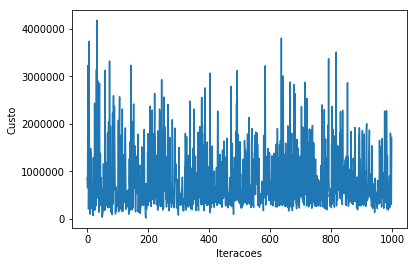

In [23]:
plt.ylabel('Custo')
plt.xlabel('Iteracoes')
plt.plot(range(cost_mbgd.shape[0]), cost_mbgd)

## Validation
Now, we had already trained our model on training set. We will use the parameters obtained to estimate the model's error on the validation set.

In [24]:
validation_size = y_validation.shape[1]
print("validation size = ", validation_size)
gd_y_hat = np.dot(w_gd.T, x_validation) + b_gd
gd_cost = l2_cost(x_validation, gd_y_hat, y_validation, validation_size)
print("The cost on validation set GD: ", gd_cost)

sgd_y_hat = np.dot(w_sgd.T, x_validation) + b_sgd
sgd_cost = l2_cost(x_validation, sgd_y_hat, y_validation, validation_size)
print("The cost on validation set SGD: ", sgd_cost)

norm_y_hat = np.dot(theta_norm.T, np.concatenate((np.ones((1, validation_size)),x_validation), axis=0))
norm_cost = l2_cost(x_validation, norm_y_hat, y_validation, validation_size)
print("The cost on validation set Normal Equation: ", norm_cost)

mbgd_y_hat = np.dot(theta_mbgd.T, np.concatenate((np.ones((1, validation_size)),x_validation), axis=0))
mbgd_cost = l2_cost(x_validation, mbgd_y_hat, y_validation, validation_size)
print("The cost on validation set mbgd: ", mbgd_cost)


validation size =  9170
The cost on validation set GD:  15591604.292582165
The cost on validation set SGD:  15476747.835007032
The cost on validation set Normal Equation:  1139544.940618867
The cost on validation set mbgd:  7614500.336049235


## Prediction

In [25]:
index = np.random.randint(validation_size)
x_index = x_validation[:, index]
y_index = y_validation[:, index]
gd_y_predict = np.dot(w_gd.T, x_index) + b_gd
sgd_y_predict = np.dot(w_sgd.T, x_index) + b_sgd
print('index = ', index)
print('the input: ', x_index)
print('gd_prediction: ', gd_y_predict)
print('sgd_prediction: ', sgd_y_predict)
print('true label: ', y_index)


index =  7728
the input:  [ 0.37  2.    1.    2.    4.66  4.68  2.85 61.   56.  ]
gd_prediction:  [0.099305]
sgd_prediction:  [28.89693992]
true label:  [613.]


# Test time!!

In [26]:
with open('../data/diamonds-test.csv', 'rb') as csvfile:
    test_dataset = pd.read_csv('../data/diamonds-test.csv')
print(test_dataset.shape)

(8091, 10)


In [27]:
#RUN THIS ONLY ONCE!
#this code saves the numpy vectors to files, if the files already exists, don't run
# nx = 9
# ny = 1

# test_size = test_dataset.shape[0]
# print ("test_size: ", test_size)


# #2. SAVE THE PANDA'S DATAFRAME ON NUMPY ARRAYS
# categorical_labels = ['carat', 'cut', 'color', 'clarity', 'x', 'y', 'z', 'depth', 'table', 'price']

# test_volume = np.empty(test_dataset.shape)

# le = LabelEncoder()

# # For each feature, copy or transforms and copy (in categorical case) to the correspondent volume
# for i in range(len(categorical_labels)):
#     if( i >= 1 and i <= 3): #if the feature is categorical
#         test_volume [:,i] = le.fit_transform(test_dataset[categorical_labels[i]])
#     else:
#         test_volume[:,i] = test_dataset[categorical_labels[i]]

# y_test = test_volume[:, 9].reshape((ny, test_dataset.shape[0]))
# x_test = test_volume[:, 0:9].T

# assert(x_test.shape == (nx, test_size))
# assert(y_test.shape == (ny, test_size))

# np.savetxt('x_test.txt', x_test, delimiter=',')   # X is an array
# np.savetxt('y_test.txt', y_test, delimiter=',')   # X is an array


In [28]:
x_test = np.loadtxt('x_test.txt', delimiter = ',')
y_test = np.loadtxt('y_test.txt', delimiter = ',')